In [ ]:
import import_ipynb
%run 03-EDA.ipynb

### Imports

In [32]:
import math
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer


import statsmodels.api as sm

<a id="5"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">5. | Model Development: CDC Data: Logistic Regression</div>

### Selected Features

In [33]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income']

<a id="5.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.1 | Model Development: CDC Data: Logistic Regression: First Iteration</div>

### Split Features and Target

In [34]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [35]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 11) (202944,)
(50736, 11) (50736,)


#### Train with Logistic Regression

In [36]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

#### Predict using Logistic Regression

In [37]:

predictions_train_lr = model_lr.predict(X_train)
predictions_test_lr  = model_lr.predict(X_test)

#### LR: Significant Variables

In [38]:
# Coefficients from scikit-learn
print("Coefficients from scikit-learn:")
print(model_lr.coef_)

# Using statsmodels to get p-values and more detailed summary
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Coefficients from scikit-learn:
[[ 0.78159903  0.59552751  0.06044038  0.02277949  0.55171499 -0.00514212
  -0.00695153  0.19144233  0.13058757 -0.03665064 -0.04581237]]
Optimization terminated successfully.
         Current function value: 0.323955
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               202944
Model:                          Logit   Df Residuals:                   202932
Method:                           MLE   Df Model:                           11
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1989
Time:                        02:40:39   Log-Likelihood:                -65745.
converged:                       True   LL-Null:                       -82070.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------

#### Coefficients and Interpretation:
 
Coefficients:
Positive Coefficients: Indicate that as the predictor increases, the log odds of the target (Diabetes_binary) being 1 (i.e., having diabetes) also increases.

Negative Coefficients: Indicate that as the predictor increases, the log odds of the target being 1 decreases.

Significant Predictors:

All predictors have a p-value (P>|z|) less than 0.05, indicating they are statistically significant.

Key Predictors:

HighBP (0.7865): Having high blood pressure is strongly associated with increased odds of diabetes, as indicated by the high positive coefficient.
HighChol (0.5925): High cholesterol is also associated with increased odds of diabetes.
GenHlth (0.5602): Poor general health significantly increases the odds of diabetes.
Age (0.1312): Older age is associated with higher odds of diabetes.
DiffWalk (0.1471): Difficulty walking is positively associated with diabetes.

Negative Predictors:

PhysActivity (-0.0356): Physical activity slightly reduces the odds of diabetes.
MentHlth (-0.0052): Better mental health reduces the odds, though the effect is small.
PhysHlth (-0.0067): Better physical health reduces the odds of diabetes.
Education (-0.0337): Higher education levels are associated with reduced odds of diabetes.
Income (-0.0433): Higher income levels are also associated with reduced odds of diabetes.
 
Model Statistics:
 
Log-Likelihood (-65745):
The log-likelihood value is used to assess model fit; higher values (closer to zero) indicate a better fit.

Pseudo R-squared (0.1989):
Indicates the proportion of variance explained by the model. While not directly comparable to R-squared in linear regression, a higher value suggests better explanatory power.

LLR p-value (0.000):
Indicates that the model is statistically significant overall.

Convergence:
The output indicates that the model converged successfully, meaning the optimization process found a solution.
 
Confidence Intervals:
 
Confidence Intervals:

Provide a range within which the true coefficient is expected to fall with 95% confidence.
For example, the coefficient for HighBP (0.7865) has a 95% confidence interval of [0.755, 0.819], indicating that the effect is consistently positive.
 
Overall Interpretation:
 
Influential Factors: High blood pressure, high cholesterol, poor general health, and age are significant predictors of diabetes risk, with high blood pressure having the strongest association.

Protective Factors: Physical activity, mental health, education, and income appear to be protective factors, reducing the risk of diabetes.

Model Fit: The model is statistically significant and explains a substantial portion of the variance in the outcome, as indicated by the pseudo R-squared.

#### Plot Confusion Matrix For Logistic Regression

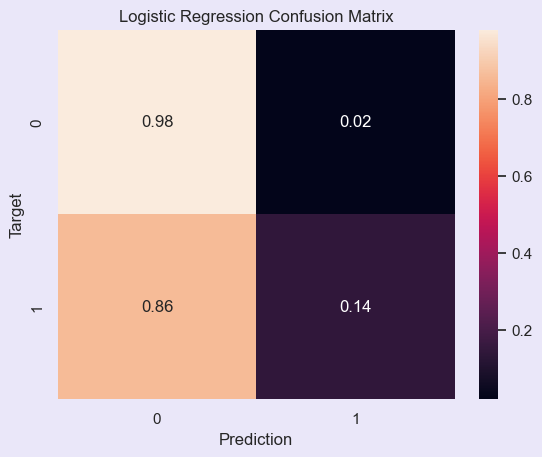

In [39]:
cf_lr = confusion_matrix(y_train, predictions_train_lr, normalize='true')
plt.figure()
sns.heatmap(cf_lr, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Logistic Regression"))
plt.show()

#### Calculate Evaluation Metrics for Logistic Regression

In [40]:
# Training set performance
lr_train_accuracy = accuracy_score(y_train, predictions_train_lr) # Calculate Accuracy
lr_train_f1 = f1_score(y_train, predictions_train_lr) # Calculate F1-score
lr_train_precision = precision_score(y_train, predictions_train_lr) # Calculate Precision
lr_train_recall = recall_score(y_train, predictions_train_lr) # Calculate Recall
lr_train_rocauc_score = roc_auc_score(y_train, predictions_train_lr)
lr_train_log_loss_value = log_loss(y_train, predictions_train_lr)


# Test set performance
lr_test_accuracy = accuracy_score(y_test, predictions_test_lr) # Calculate Accuracy
lr_test_f1 = f1_score(y_test, predictions_test_lr) # Calculate F1-score
lr_test_precision = precision_score(y_test, predictions_test_lr) # Calculate Precision
lr_test_recall = recall_score(y_test, predictions_test_lr) # Calculate Recall
lr_test_rocauc_score = roc_auc_score(y_test, predictions_test_lr) #Calculate Roc
lr_test_log_loss_value = log_loss(y_test, predictions_test_lr)

print('LR: Model performance for Training set')
print("- Accuracy: {:.4f}".format(lr_train_accuracy))
print('- F1 score: {:.4f}'.format(lr_train_f1))
print('- Precision: {:.4f}'.format(lr_train_precision))
print('- Recall: {:.4f}'.format(lr_train_recall))
print('- Roc Auc Score: {:.4f}'.format(lr_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(lr_train_log_loss_value))

    
    
print('----------------------------------')
    
print('LR: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(lr_test_accuracy))
print('- F1 score: {:.4f}'.format(lr_test_f1))
print('- Precision: {:.4f}'.format(lr_test_precision))
print('- Recall: {:.4f}'.format(lr_test_recall))
print('- Roc Auc Score: {:.4f}'.format(lr_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(lr_test_log_loss_value))

    
print('='*35)
print('\n')

LR: Model performance for Training set
- Accuracy: 0.8627
- F1 score: 0.2231
- Precision: 0.5315
- Recall: 0.1412
- Roc Auc Score: 0.5605
- Log Loss: 4.9505
----------------------------------
LR: Model performance for Test set
- Accuracy: 0.8646
- F1 score: 0.2302
- Precision: 0.5330
- Recall: 0.1468
- Roc Auc Score: 0.5631
- Log Loss: 4.8806




#### LR: MSE and RMSE


In [41]:
mse_lr = mean_squared_error(y_test,predictions_test_lr)
print('mse_lr:'+str(mse_lr))
rmse_lr = math.sqrt(mean_squared_error(y_test,predictions_test_lr))
print('rmse_lr:'+str(rmse_lr))

mse_lr:0.13540681173131505
rmse_lr:0.3679766456330008


#### LR: Classification Report


In [42]:
cm_lr_train = classification_report(y_train,predictions_train_lr)

print('Logistic Regression Model: Train\n')
print(cm_lr_train)

cm_lr_test = classification_report(y_test,predictions_test_lr)

print('Logistic Regression Model: Test\n')
print(cm_lr_test)

Logistic Regression Model: Train

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92    174595
         1.0       0.53      0.14      0.22     28349

    accuracy                           0.86    202944
   macro avg       0.70      0.56      0.57    202944
weighted avg       0.83      0.86      0.83    202944

Logistic Regression Model: Test

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.53      0.15      0.23      6997

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



#### LR: N-fold cross-validation

In [43]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_lr = LogisticRegression()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = model_lr.predict(X_train_kfold)
    pred_test_lr_kfold = model_lr.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_lr_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_lr_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_lr_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_lr_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_lr_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_lr_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy = np.mean(training_accuracies)
std_train_accuracy = np.std(training_accuracies)
mean_test_accuracy = np.mean(testing_accuracies)
std_test_accuracy = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy:.2f} ± {std_train_accuracy:.2f}")
print(f"Test Accuracy: {mean_test_accuracy:.2f} ± {std_test_accuracy:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1 = np.mean(training_f1)
std_train_f1 = np.std(training_f1)
mean_test_f1 = np.mean(testing_f1)
std_test_f1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1:.2f} ± {std_train_f1:.2f}")
print(f"Test F1: {mean_test_f1:.2f} ± {std_test_f1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision = np.mean(training_precision)
std_train_precision = np.std(training_precision)
mean_test_precision = np.mean(testing_precision)
std_test_precision = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision:.2f} ± {std_train_precision:.2f}")
print(f"Test Precision: {mean_test_precision:.2f} ± {std_test_precision:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall = np.mean(training_recall)
std_train_recall = np.std(training_recall)
mean_test_recall = np.mean(testing_recall)
std_test_recall = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall:.2f} ± {std_train_recall:.2f}")
print(f"Test Recall: {mean_test_recall:.2f} ± {std_test_recall:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score = np.mean(training_rocauc_score)
std_train_rocauc_score = np.std(training_rocauc_score)
mean_test_rocauc_score = np.mean(testing_rocauc_score)
std_test_rocauc_score = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score:.2f} ± {std_train_rocauc_score:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score:.2f} ± {std_test_rocauc_score:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value = np.mean(training_log_loss_value)
std_train_log_loss_value = np.std(training_log_loss_value)
mean_test_log_loss_value = np.mean(testing_log_loss_value)
std_test_log_loss_value = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value:.2f} ± {std_train_log_loss_value:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value:.2f} ± {std_test_log_loss_value:.2f}")
print("="*50)





Training Accuracy: 0.86 ± 0.00
Test Accuracy: 0.86 ± 0.00


Training F1: 0.23 ± 0.01
Test F1: 0.23 ± 0.00


Training Precision: 0.53 ± 0.00
Test Precision: 0.53 ± 0.01


Training Recall: 0.14 ± 0.00
Test Recall: 0.14 ± 0.00


Training RO-AUC: 0.56 ± 0.00
Test RO-AUC: 0.56 ± 0.00


Training Log Loss: 4.94 ± 0.00
Test Log Loss: 4.94 ± 0.02


<a id="5.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.1 | Model Development: CDC Data: Logistic Regression: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>
Accuracy - 86% <br>
F1 Score - 0.23 <br>
RO-AUC   - 0.56 <br>
Log Loss - 4.94 <br>

<b>Overall Conclusions:</b>
 
Class Imbalance: The disparity between high accuracy and low F1 score, recall, and RO-AUC suggests class imbalance. 
The model is likely biased towards predicting the majority class.

Model Calibration and Discrimination: 
The high Log Loss and low RO-AUC indicate that the model's probability estimates are poorly calibrated and 
it struggles to discriminate between classes.

<b>Need for Improvement: </b>

Focus on improving recall and F1 score by:
Addressing class imbalance through techniques like oversampling the minority class, 

undersampling the majority class, 

or using synthetic data generation (e.g., SMOTE).

Exploring different algorithms or hyperparameters that might better capture the minority class.

Evaluating additional metrics such as the confusion matrix to identify where the model is making errors.

</div>



<a id="5.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.2 | Model Development: CDC Data: Logistic Regression: Second Iteration</div>

Model shows overall good performance.

It can be improved by resolving the class imbalance and hyper parameter tuning.

To put through the optimizations with these enhancements